<a href="https://colab.research.google.com/github/fideslynn/data_science_fundamentals/blob/main/WorldHappinessReport2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Happiness Report 2021
Submitted by Fides Gastanes - Lynn

This report made by the *United Nations Sustainable Development Solutions Network* is based on a wide variety of data, but most importantly, the data gathered from the *Gallup World Poll* that measures happiness throughout all the countries in the world. 

The report showcases the state of happiness of every nation through the lens of measurements of well-being described by experts in the fields of economics, psychology, survey analysis, national statistics, public policy and health. 

The six variables used to measure happiness in the report are income, healthy life expectancy, having someone to count on in times of trouble, generosity, freedom and trust (as measured by the absence of corruption in business and government). 

This annual report has been used by governments and other organizations to make better policy-making decisions. 



In [3]:
# To mount data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# To import pandas and pyplot libraries

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [5]:
# To load dataset

filename = '/content/drive/MyDrive/CODING_DOJO/DATA_SCIENCE_BOOTCAMP/(04) WEEK 4 - Statistical Inference/WORLD HAPPINESS REPORT/DataForFigure2.1WHR2021C2.xls'
df = pd.read_excel(filename)

In [6]:
# To check if the first dataset loaded correctly

df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8421,0.031646,7.904126,7.780075,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846,2.430343,1.446356,1.106192,0.740824,0.690577,0.124200,0.480524,3.253415
1,Denmark,Western Europe,7.6195,0.034657,7.687428,7.551572,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838,2.430343,1.501548,1.108008,0.762862,0.686160,0.207615,0.484993,2.868296
2,Switzerland,Western Europe,7.5715,0.036243,7.642536,7.500463,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698,2.430343,1.565899,1.079469,0.816415,0.653488,0.204040,0.413019,2.839148
3,Iceland,Western Europe,7.5539,0.059373,7.670271,7.437528,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865,2.430343,1.482190,1.172279,0.772319,0.697701,0.292526,0.169940,2.966945
4,Netherlands,Western Europe,7.4640,0.027326,7.517559,7.410441,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938,2.430343,1.501072,1.079151,0.753425,0.646585,0.302397,0.383531,2.797818


We have successfully loaded the dataset.

## Exploring the Dataset

In [7]:
# To determine how many rows and columns

df.shape

(149, 20)

The dataset has 149 rows and 20 columns.

In [8]:
# To determine the data types of each variable

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

The dataset has 18 float type variables and 2 object type variables. There are no null values in this data set.

### Cleaning the Data

In [9]:
# To determine if there are duplicate rows

len(df[df.duplicated()])

0

There are no duplicate rows in the dataset.

In [10]:
# To identify missing values

df.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

There are no null values.

### Fixing Inconsistencies

#### Dropping and Renaming Columns

Our dataset contains some columns that we are not going to use because they are insignificant to our goal. We are going to drop these columns. These columns include:

1.   Standard error of ladder score
2.   upperwhisker
3.   lowerwhisker
4.   Ladder score in Dystopia
5.   Explained by: Log GDP per capita
6.   Explained by: Social support
7.   Explained by: Healthy life expectancy
8.   Explained by: Freedom to make life choices
9.   Explained by: Generosity
10.   Explained by: Perceptions of corruption
11.   Dystopia + residual

We are also going to rename the remaining columns so that they will have better syntax.

In [11]:
# To drop columns

df.drop(columns=['Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Ladder score in Dystopia',
                 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy',
                 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption',
                 'Dystopia + residual'], inplace = True)

df.head()


,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.8421,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846
1,Denmark,Western Europe,7.6195,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838
2,Switzerland,Western Europe,7.5715,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698
3,Iceland,Western Europe,7.5539,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865
4,Netherlands,Western Europe,7.4640,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938


In [12]:
# To rename columns

df.columns = ['Country_Name', 'Regional_Indicator', 'Ladder_Score','Logged_GDP_Per_Capita', 'Social_Support', 'Healthy_Life_Expectancy',
               'Freedom_To_Make_Life_Choices', 'Generosity', 'Perceptions_Of_Corruption']

df.head()


,Country_Name,Regional_Indicator,Ladder_Score,Logged_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_To_Make_Life_Choices,Generosity,Perceptions_Of_Corruption
0,Finland,Western Europe,7.8421,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846
1,Denmark,Western Europe,7.6195,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838
2,Switzerland,Western Europe,7.5715,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698
3,Iceland,Western Europe,7.5539,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865
4,Netherlands,Western Europe,7.4640,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938


### Checking Data Types

In [13]:
# To ensure all values in each column match the data types listed

for columns in list(df):
    print(columns)
    print(df[columns].unique())

Country_Name
['Finland' 'Denmark' 'Switzerland' 'Iceland' 'Netherlands' 'Norway'
 'Sweden' 'Luxembourg' 'New Zealand' 'Austria' 'Australia' 'Israel'
 'Germany' 'Canada' 'Ireland' 'Costa Rica' 'United Kingdom'
 'Czech Republic' 'United States' 'Belgium' 'France' 'Bahrain' 'Malta'
 'Taiwan Province of China' 'United Arab Emirates' 'Saudi Arabia' 'Spain'
 'Italy' 'Slovenia' 'Guatemala' 'Uruguay' 'Singapore' 'Kosovo' 'Slovakia'
 'Brazil' 'Mexico' 'Jamaica' 'Lithuania' 'Cyprus' 'Estonia' 'Panama'
 'Uzbekistan' 'Chile' 'Poland' 'Kazakhstan' 'Romania' 'Kuwait' 'Serbia'
 'El Salvador' 'Mauritius' 'Latvia' 'Colombia' 'Hungary' 'Thailand'
 'Nicaragua' 'Japan' 'Argentina' 'Portugal' 'Honduras' 'Croatia'
 'Philippines' 'South Korea' 'Peru' 'Bosnia and Herzegovina' 'Moldova'
 'Ecuador' 'Kyrgyzstan' 'Greece' 'Bolivia' 'Mongolia' 'Paraguay'
 'Montenegro' 'Dominican Republic' 'North Cyprus' 'Belarus' 'Russia'
 'Hong Kong S.A.R. of China' 'Tajikistan' 'Vietnam' 'Libya' 'Malaysia'
 'Indonesia' 'Congo (B

There appears to be no anomalies in how the data was logged.

## Statistical Analysis


### Summary of Statistics

In [14]:
# To obtain the complete summary statistics of each numerical column

numerical_summary_stats = df[['Ladder_Score','Logged_GDP_Per_Capita', 'Social_Support', 'Healthy_Life_Expectancy',
               'Freedom_To_Make_Life_Choices', 'Generosity', 'Perceptions_Of_Corruption']].describe()

numerical_summary_stats

,Ladder_Score,Logged_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_To_Make_Life_Choices,Generosity,Perceptions_Of_Corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532832,9.432209,0.814726,64.992784,0.791572,-0.015149,0.727477
std,1.073923,1.158585,0.114892,6.762071,0.113315,0.150653,0.179266
min,2.522900,6.635322,0.462596,48.478001,0.381749,-0.288153,0.081959
25%,4.851800,8.540956,0.749777,59.801552,0.718051,-0.126469,0.666607
50%,5.533500,9.568728,0.831914,66.603096,0.804414,-0.036025,0.780623
75%,6.255400,10.421198,0.904702,69.599998,0.877263,0.078830,0.844619
max,7.842100,11.646564,0.982938,76.952858,0.970131,0.541553,0.939343


## Exploratory Data Analysis

### Univariate Exploratory Visualizations

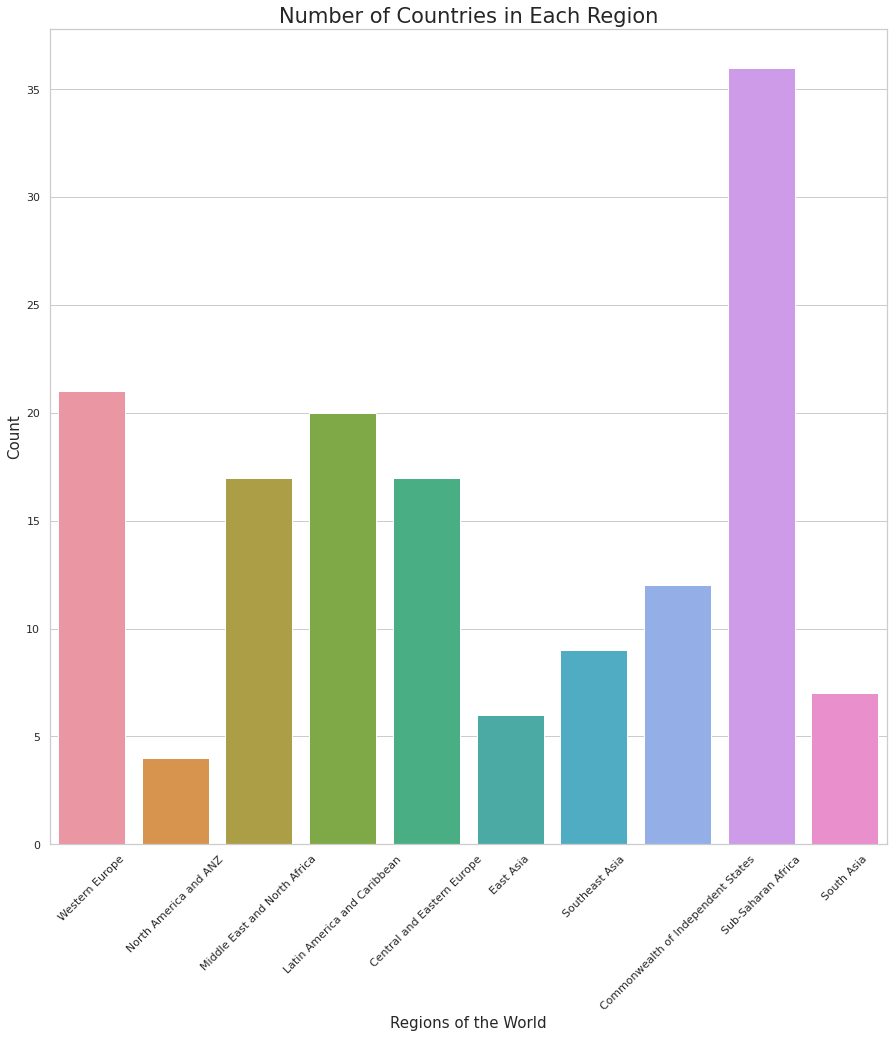

In [15]:
# To create histogram for Regional_Indicator column using Plotly Express

# To set style 
sns.set_theme(style='whitegrid', palette='Spectral_r')
sns.countplot(x=df['Regional_Indicator'])
fig = plt.gcf()
fig.set_size_inches(15,15)

plt.xlabel('Regions of the World', fontsize = 15)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize = 15)
plt.title("Number of Countries in Each Region", fontsize = 21)

plt.show()


Most countries in this report belong to the Sub-Saharan Africa region. The least number of countries belong to the North America and ANZ region.

<Figure size 1512x432 with 0 Axes>

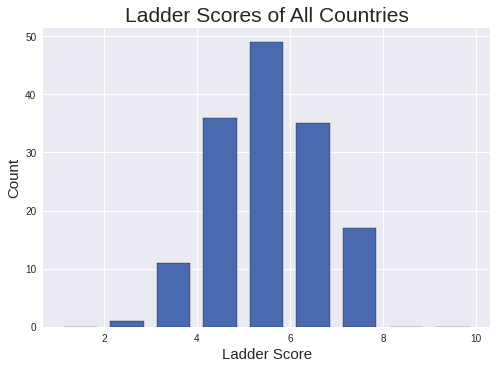

In [16]:
# To create histogram for Ladder_Score column

plt.style.use('seaborn')

plt.figure(figsize = (21,6))

df.hist(column='Ladder_Score', 
        edgecolor='black', 
        color='#496AAE',
        rwidth= 0.72, # To put a gap between bars
        bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) 

plt.xlabel('Ladder Score', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title("Ladder Scores of All Countries", fontsize = 21)

plt.show()

Most of the countries have a ladder score between 5 and 6. None of the countries scored on the extremes.

### Multivariate Exploratory Visualizations

#### Categorical/Continuous

We shall use boxplots or bar charts to compare the two.

##### Regional Indicator To Ladder Score

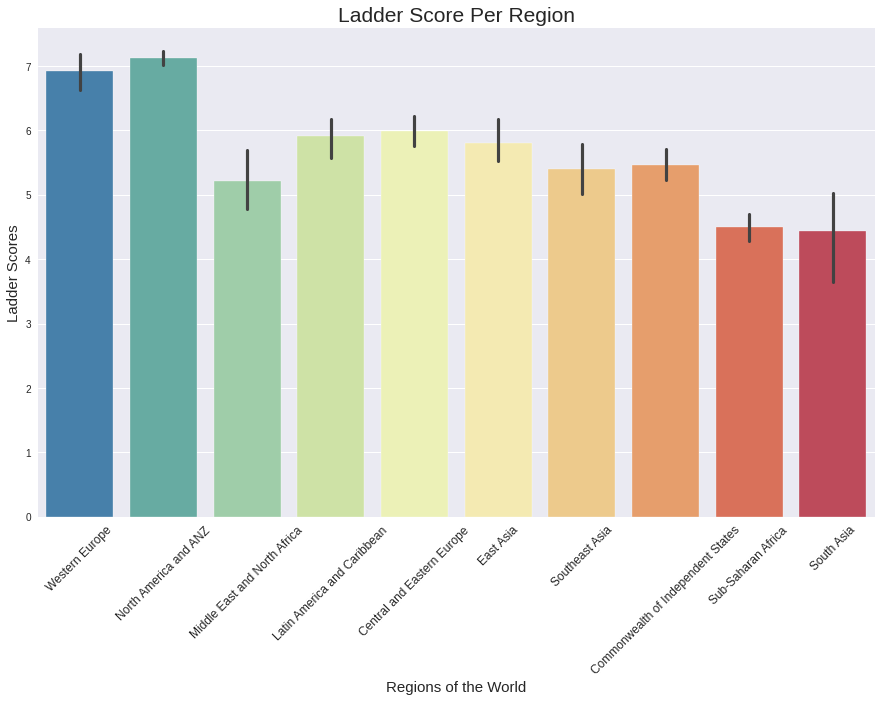

In [17]:
# To create bar chart

fig = plt.figure(figsize = (15,9))

sns.barplot(x = 'Regional_Indicator', 
            y = 'Ladder_Score', 
            palette = 'Spectral_r', 
            data = df)

plt.xlabel('Regions of the World', fontsize = 15)
plt.xticks(rotation = 45, fontsize = 12)
plt.ylabel('Ladder Scores', fontsize = 15)
plt.title('Ladder Score Per Region', fontsize = 21)

plt.show()

The highest ladder scores come from the North America and ANZ region, followed closely by Western Europe. The lowest ladder scores come from South Asia, followed closely by Sub-Sahara Africa.

##### Regional Indicator and Healthy Life Expectancy

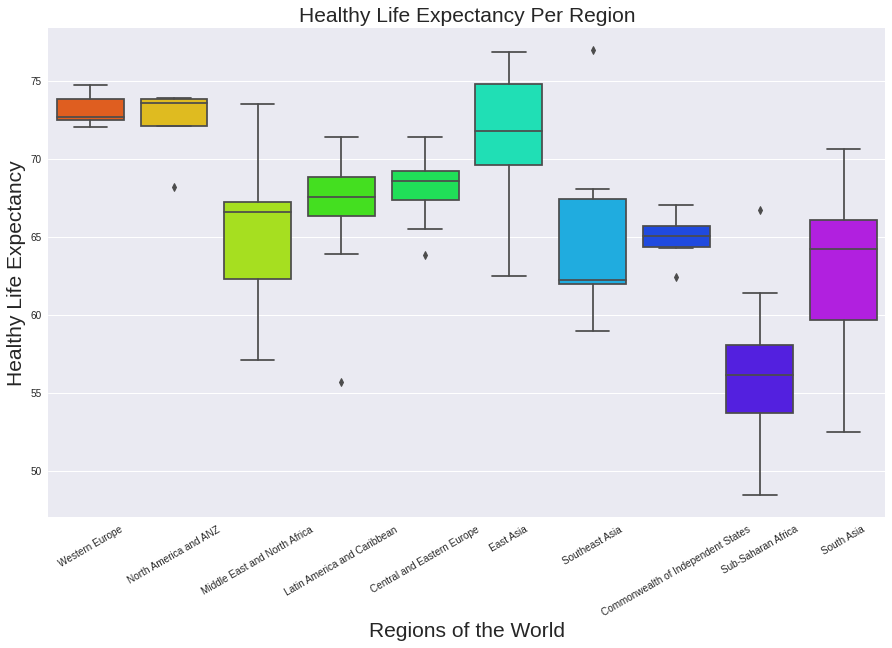

In [18]:
# To configure plot width and height
fig, axes = plt.subplots(nrows = 1, 
                         ncols = 1, 
                         figsize = (15,9))

Regions_Life_Expectancy_BP = sns.boxplot(x='Regional_Indicator', 
                                         y='Healthy_Life_Expectancy', 
                                         data = df, 
                                         palette = 'gist_rainbow')

# To make labels diagonal

Regions_Life_Expectancy_BP.set_xticklabels(Regions_Life_Expectancy_BP.get_xticklabels(), 
                                           rotation = 30)

# To label x and y axis
Regions_Life_Expectancy_BP.set_xlabel('Regions of the World',
                                      fontsize=21);

Regions_Life_Expectancy_BP.set_ylabel('Healthy Life Expectancy',
                                      fontsize=21);

plt.title('Healthy Life Expectancy Per Region', fontsize = 21)

plt.show()

The region of the world with the highest life expectancy is Easy Asia while the lowest is the Sub-Saharan Africa region. However, the highest median age for healthy life expectancy is actually from the North America and ANZ region.

##### Country and Ladder Score

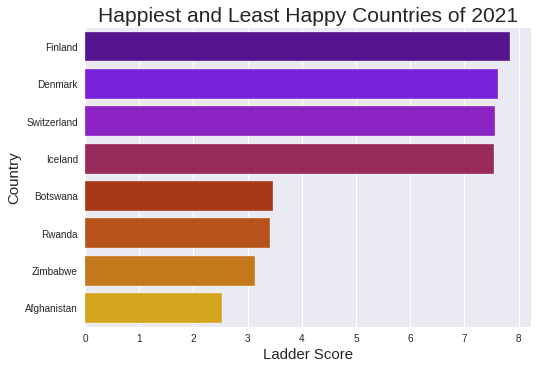

In [58]:
happiest_df = df[(df.loc[:, 'Ladder_Score'] > 7.5) | (df.loc[:, 'Ladder_Score'] < 3.5)] # Sets each bit to 1 if one of two bits is 1
sns.barplot(x = 'Ladder_Score', 
            y= 'Country_Name', 
            data = happiest_df, 
            palette='gnuplot')

plt.xlabel('Ladder Score', fontsize = 15)
plt.ylabel('Country', fontsize = 15)
plt.title('Happiest and Least Happy Countries of 2021', fontsize = 21)


plt.show()

in 2021, the happiest country is Finland and the least happy is Afghanistan.

#### Continuous/Continuous

We shall use scatter plots so we can see how continuous variables interact with one another.

##### Freedom to Make Life Choices and Logged GDP Per Capita

<Figure size 2160x1080 with 0 Axes>

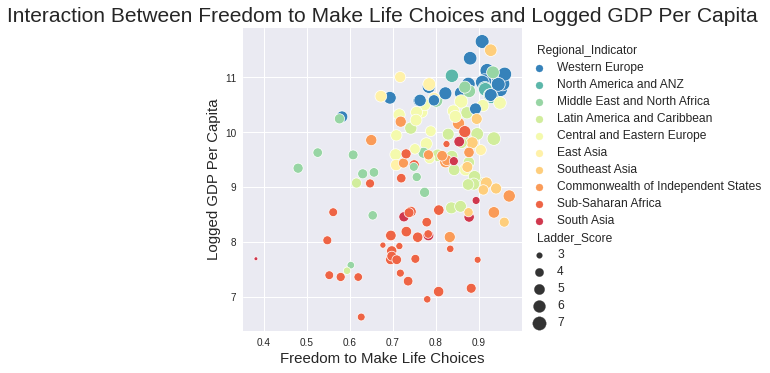

In [19]:
# To make scatter plot

fig = plt.figure(figsize = (30,15))

sns.relplot(x='Freedom_To_Make_Life_Choices',
            y='Logged_GDP_Per_Capita',
            hue='Regional_Indicator',
            size='Ladder_Score',
            sizes=(15, 210),
            palette='Spectral_r',
            data = df)

plt.xlabel('Freedom to Make Life Choices', fontsize = 15)
plt.ylabel('Logged GDP Per Capita', fontsize = 15)
plt.title('Interaction Between Freedom to Make Life Choices and Logged GDP Per Capita', fontsize = 21)

plt.show()

Most countries in Western Europe and North America/ANZ that enjoy the highest logged GDP per capita rank highest when it comes to freedom to make life choices. They also have higher/the highest ladder scores.

Most countries in Sub-Saharan Africa and South Asia have the lowest logged GDP per capita and have low ladder scores although their rankings for freedom to make life choices vary significantly.

##### Perceptions of Corruption and Logged GDP Per Capita

<Figure size 2160x1080 with 0 Axes>

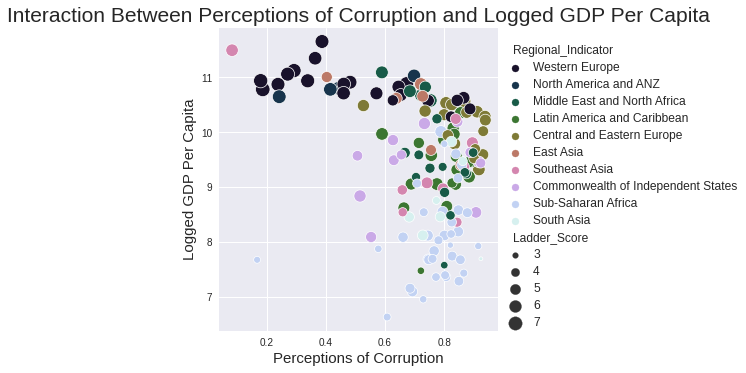

In [20]:
# To make scatter plot

fig = plt.figure(figsize = (30,15))

sns.relplot(x='Perceptions_Of_Corruption',
            y='Logged_GDP_Per_Capita',
            hue='Regional_Indicator',
            size='Ladder_Score',
            sizes=(15, 210),
            palette='cubehelix',
            data = df)

plt.xlabel('Perceptions of Corruption', fontsize = 15)
plt.ylabel('Logged GDP Per Capita', fontsize = 15)
plt.title('Interaction Between Perceptions of Corruption and Logged GDP Per Capita', fontsize = 21)

plt.show()

Most countries from Western Europe and some from the North America and ANZ region enjoy a high logged GDP per capita and lower perceptions of corruption. They also score higher on the happiness index. 

Most countries from the Commonwealth of Independent States have the lowest GDP and highest perceptions of corruption. They score the lowest on the happiness index.

There is a lone country from Southeast Asia that has the lowest perception of corruption and have relatively higher GDP. Although its ladder score is just average.

##### Healthy Life Expectancy and Logged GDP Per Capita

<Figure size 2160x1080 with 0 Axes>

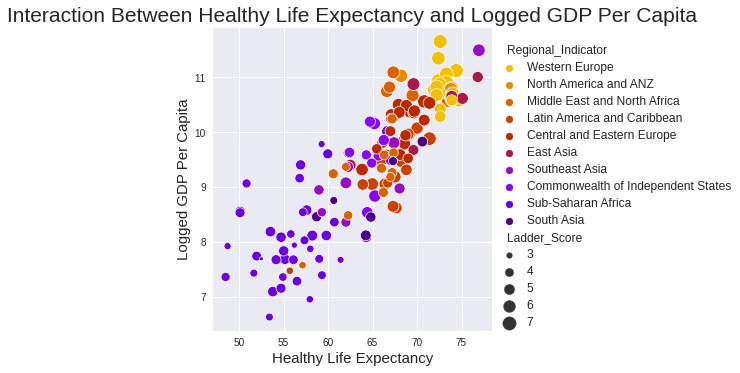

In [34]:
# To make scatter plot

fig = plt.figure(figsize = (30,15))

sns.relplot(x='Healthy_Life_Expectancy',
            y='Logged_GDP_Per_Capita',
            hue='Regional_Indicator',
            size='Ladder_Score',
            sizes=(15, 210),
            palette='gnuplot_r',
            data = df)

plt.xlabel('Healthy Life Expectancy', fontsize = 15)
plt.ylabel('Logged GDP Per Capita', fontsize = 15)
plt.title('Interaction Between Healthy Life Expectancy and Logged GDP Per Capita', fontsize = 21)

plt.show()

Countries from Western Europe are the ones who enjoy high logged GDP per capita, healthy life expectancy and happiness scores. There is a country from Southeast Asia that scores high on all three as well but it is a lone country.

Countries from Sub-Saharan Africa have the lowest healthy life expectancy and logged GDP per capita. They also have lower ladder scores.

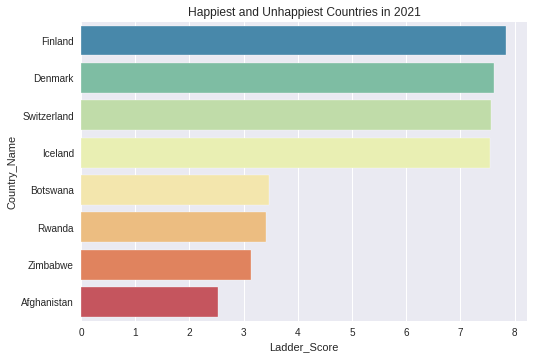

In [49]:
happiest_df = df[(df.loc[:, 'Ladder_Score'] > 7.5) | (df.loc[:, 'Ladder_Score'] < 3.5)] # Sets each bit to 1 if one of two bits is 1
sns.barplot(x = 'Ladder_Score', 
            y= 'Country_Name', 
            data = happiest_df, 
            palette='Spectral_r')

plt.xlabel('Ladder Score', fontsize = 15)
plt.ylabel('Country', fontsize = 15)
plt.title('Happiest and Unhappiest Countries in 2021', fontsize = 21)


plt.show()

### Correlation Matrix

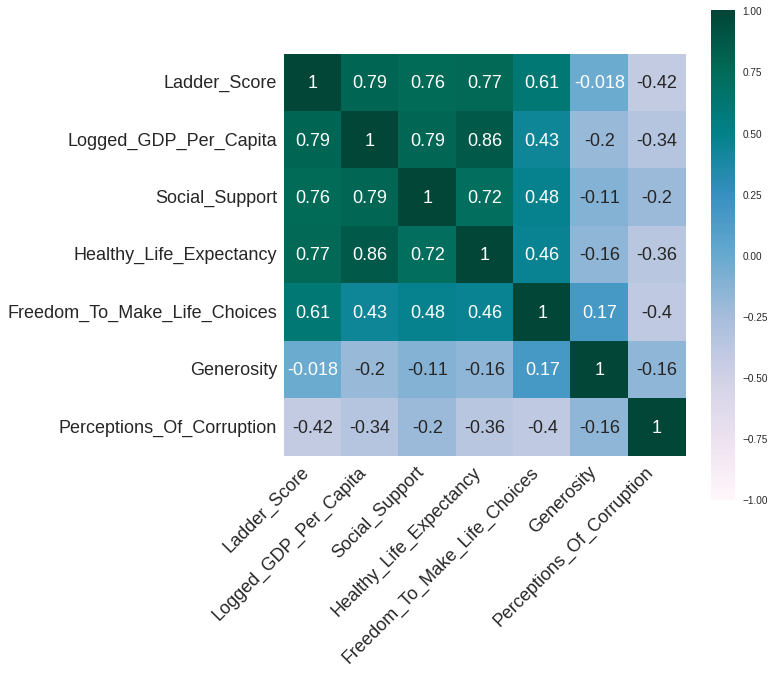

In [62]:
corr_mat = df.corr()

plt.figure(figsize=(9, 9)) 


# To plot the correlation matrix

ax = sns.heatmap(corr_mat, 
                 vmin = -1, vmax = 1, center = 0,
                 square = True,
                 cmap = 'PuBuGn',
                 annot = True,
                 annot_kws={"size":18}) # To increase annotation fontsize

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right',
                   fontsize = 18)

ax.set_yticklabels(ax.get_yticklabels(),
                   rotation=0,
                   horizontalalignment='right',
                   fontsize = 18)

plt.show()

#### Observations

*   There is a high correlation between ladder scores and logged GDP per capita. The richer a country is, the happier its citizens are.

*   There is a high correlation between ladder scores and social support. This means that when  citizens feel that they are given assistance by their social network, they are more likely to score high in the happiness index.

*   There is also a high correlation between ladder scores and healthy life expectancy. Richer nations tend to have higher life expectancy. 

*   There is also a positive correlation between ladder scores and freedom to to make life choices. When citizens perceive that they have more liberty to decide over their lives, they are happier.

*   Generosity and Perceptions of Corruption do not seem to have a correlation to happiness scores.





## Conclusions

In 2021, the happiest countries in the world are often from Western Europe and the North America and ANZ region. Specifically, Finland ranked first in terms of happiness. 

Richer countries tend to be happier. They tend to rank higher in social support and healthy life expectancy. This is probably because their governments have more money to spend on its citizens. They have effective and efficient social programs in place that make sure that their population's wellbeing is in check. Their citizens also have more freedom to choose what to do about their lives.

On the contrary, the Sub-Sahara Africa region have the lowest happiness scores. Specifically, Afghanistan scored the lowest in the happiness index.

Poorer countries tend to score lowest when it comes to social support. Their government probably don't have the budget to support its population and make sure everyone is well taken care of. They have the lowest scores for healthy life expectancy. Their country usually don't have medicare or the like to cover their citizen's healthcare, especially during a pandemic.

Citizens from poorer countries also don't seem to have as much freedom of choice.

Generosity and Perception of Corruption don't seem to affect anyone's happiness. It's either people are so used to corruption that they have become nonchalant about it or corruption is not present in their countries. They might also see generosity as something that is up to an individual to practice and not the collective.